In [13]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.rc('axes', axisbelow=True)
from matplotlib.colors import to_rgb

from utils.visualization import plot_median_errorbars

In [14]:
## create color palette for encoder and decoder models

def get_colors(color, n, max_blend = .8):

    base_color = to_rgb(color)
    tones = np.array([(1 - (i / (n - 1)) * max_blend) * np.array(base_color) + ((i / (n - 1)) * max_blend) * np.array([1, 1, 1]) for i in range(n)])
    
    return tones

c_encoder = get_colors('navy', n = 14)
c_decoder = get_colors('purple', n = 10)

In [17]:
## panel 2 (VISION MODELS)

## load encoder-only models

with open('../_data/fig-symmetry-vision-models/full-models/BEiT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
BEiT_par = [86e6, 86e6, 86e6, 307e6, 86e6, 307e6]
BEiT_score = [models[key][-1].flatten() for key in list(models.keys())]
BEiT_names = list(models.keys())

with open('../_data/fig-symmetry-vision-models/full-models/DeiT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
DeiT_par = [5e6, 22e6, 86e6]
DeiT_score = [models[key][-1].flatten() for key in list(models.keys())]
DeiT_names = list(models.keys())

with open('../_data/fig-symmetry-vision-models/full-models/DINO-query-key.pkl', 'rb') as file:
    models = pickle.load(file)    
DINO_par = [21e6, 85e6, 21e6, 85e6, 22.1e6, 86.6e6, 304e6, 1140e6][3:]
DINO_score = [models[key][-1].flatten() for key in list(models.keys())[3:]]
DINO_names = list(models.keys())

with open('../_data/fig-symmetry-vision-models/full-models/DIT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)    
DIT_par = [86e6, 307e6]
DIT_score = [models[key][-1].flatten() for key in list(models.keys())]
DIT_names = list(models.keys())

with open('../_data/fig-symmetry-vision-models/full-models/DETREncoder-query-key.pkl', 'rb') as file:
    models = pickle.load(file)    
DETREncoder_par = [860e6]
DETREncoder_score = [models[key][-1].flatten() for key in list(models.keys())]
DETREncoder_names = list(models.keys())

with open('../_data/fig-symmetry-vision-models/full-models/DETRDecoder-query-key.pkl', 'rb') as file:
    models = pickle.load(file)    
DETRDecoder_par = [860e6]
DETRDecoder_score = [models[key][-1].flatten() for key in list(models.keys())]
DETRDecoder_names = list(models.keys())

with open('../_data/fig-symmetry-vision-models/full-models/GIT-images-query-key.pkl', 'rb') as file:
    models = pickle.load(file)    
GIT_images_par = [129e6, 340e6]
GIT_images_score = [models[key][-1].flatten() for key in list(models.keys())]
GIT_images_names = list(models.keys())

with open('../_data/fig-symmetry-vision-models/full-models/GIT-text-query-key.pkl', 'rb') as file:
    models = pickle.load(file)    
GIT_text_par = [129e6, 340e6]
GIT_text_score = [models[key][-1].flatten() for key in list(models.keys())]
GIT_text_names = list(models.keys())

with open('../_data/fig-symmetry-vision-models/full-models/iGPT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)    
iGPT_par = [76e6, 455e6, 1360e6]
iGPT_score = [models[key][-1].flatten() for key in list(models.keys())]
iGPT_names = list(models.keys())

/Users/matteosaponati/Desktop/repos/attention-geometry/utils/visualization.py:74: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(parameters[k], median, yerr = [[q1_range], [q2_range]],


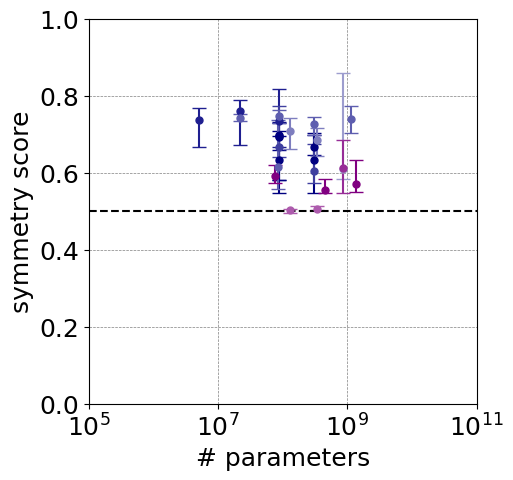

In [22]:
plt.figure(figsize=(5,5))

plot_median_errorbars(BEiT_par, BEiT_score, color = c_encoder[0])
plot_median_errorbars(DeiT_par, DeiT_score, color = c_encoder[2])
plot_median_errorbars(DIT_par, DIT_score, color = c_encoder[4])
plot_median_errorbars(DINO_par, DINO_score, color = c_encoder[6])
plot_median_errorbars(GIT_images_par, GIT_images_score, color = c_encoder[8])
plot_median_errorbars(DETREncoder_par, DETREncoder_score, color = c_encoder[10])

plot_median_errorbars(iGPT_par, iGPT_score, color = c_decoder[0])
plot_median_errorbars(DETRDecoder_par, DETRDecoder_score, color = c_decoder[2])
plot_median_errorbars(GIT_text_par, GIT_text_score, color = c_decoder[4])

plt.axhline(y=.5,linestyle='dashed',color='k')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xscale('log')
plt.ylim(0,1)
plt.ylabel('symmetry score')
plt.xlabel('# parameters')
plt.xlim(1e5,10e10)

plt.savefig('../figures/fig1-vision-models.pdf', format='pdf', dpi=300)